In [ ]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D
import random
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# **Data preparation**

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


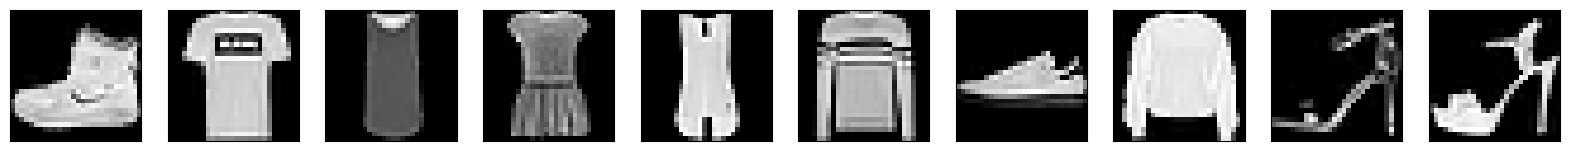

In [ ]:
fig, axes = plt.subplots(ncols=10, sharex=False,
    sharey=True, figsize=(20, 8))
for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# **Model creating**

In [ ]:
model_3 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', input_shape=(28,28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Conv2D(64, (3,3), padding='same', input_shape=(28,28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),

    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 256)              

In [ ]:
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

In [ ]:
model_3.fit(x_train, y_train, epochs=30, batch_size=512, validation_data=(x_test, y_test), callbacks=early_stopping )

Epoch 1/30
118/118 [==============================] - 52s 426ms/step - loss: 0.5890 - accuracy: 0.7882 - val_loss: 0.4219 - val_accuracy: 0.8461
Epoch 2/30
118/118 [==============================] - 49s 414ms/step - loss: 0.3492 - accuracy: 0.8765 - val_loss: 0.3565 - val_accuracy: 0.8702
Epoch 3/30
118/118 [==============================] - 48s 408ms/step - loss: 0.2940 - accuracy: 0.8934 - val_loss: 0.3070 - val_accuracy: 0.8861
Epoch 4/30
118/118 [==============================] - 48s 407ms/step - loss: 0.2634 - accuracy: 0.9042 - val_loss: 0.2978 - val_accuracy: 0.8929
Epoch 5/30
118/118 [==============================] - 48s 404ms/step - loss: 0.2363 - accuracy: 0.9131 - val_loss: 0.2791 - val_accuracy: 0.8977
Epoch 6/30
118/118 [==============================] - 48s 407ms/step - loss: 0.2167 - accuracy: 0.9196 - val_loss: 0.2756 - val_accuracy: 0.8968
Epoch 7/30
118/118 [==============================] - 48s 405ms/step - loss: 0.2016 - accuracy: 0.9259 - val_loss: 0.2525 - val_ac

# **Test Accuracy**

In [ ]:
test_loss, test_acc = model_3.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2453 - accuracy: 0.9190


# **Predictions and visualization**

In [ ]:
predictions = model_3.predict(x_test)
predictions.shape
predictions[0]

313/313 [==============================] - 3s 9ms/step


array([3.37414860e-08, 5.96375429e-08, 1.30808542e-06, 8.40682475e-08,
       2.94095308e-08, 2.66982556e-06, 3.04535575e-07, 1.01594385e-04,
       9.83099184e-08, 9.99893725e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[9]

'Ankle boot'

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

# **Visualization of first 30 predictions**

<ipython-input-51-70ca18ebaa7f>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_rows, 2*num_cols, 2*i+1)


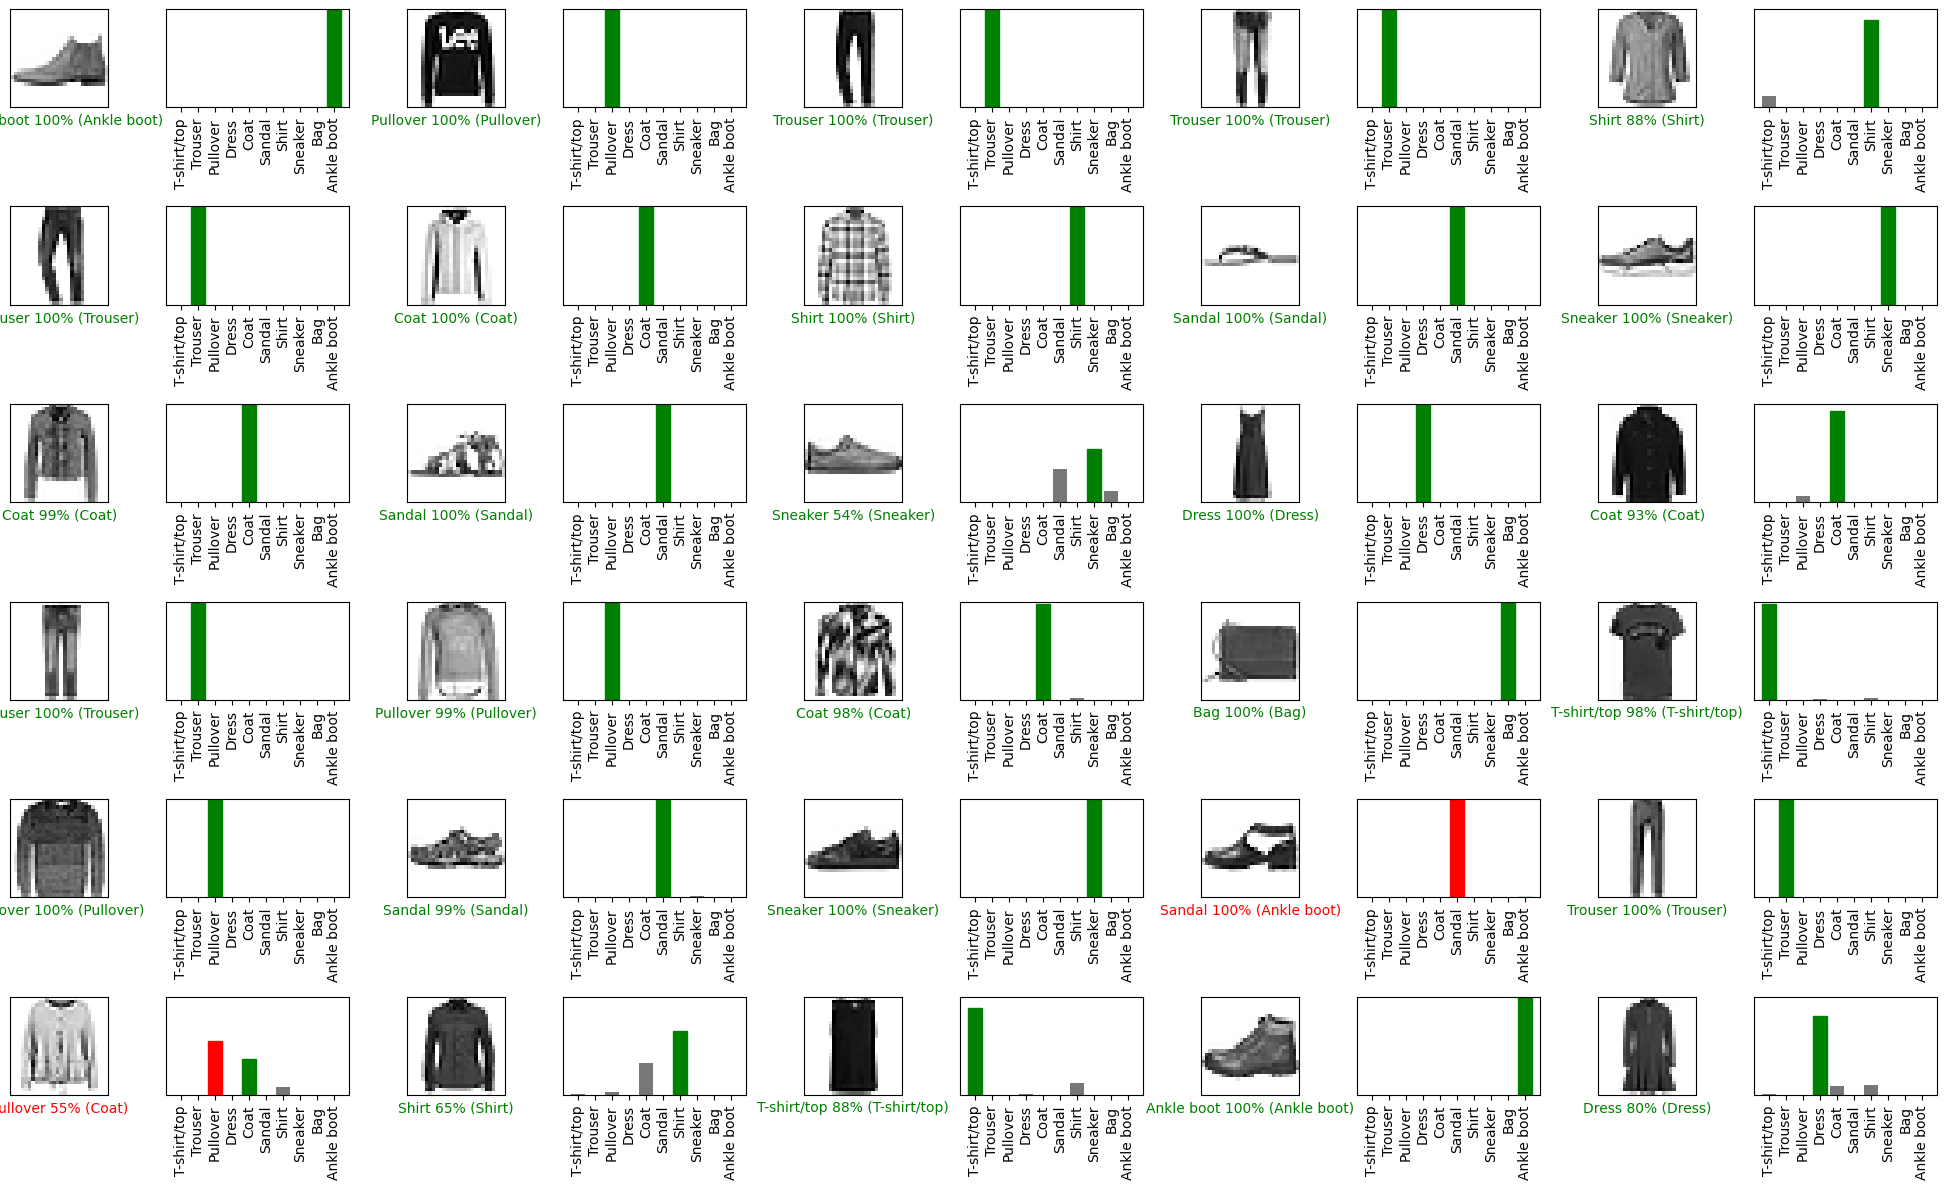

In [ ]:
num_rows = 6
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
  _ = plt.xticks(range(10), class_names, rotation=90)
plt.tight_layout()
plt.show()

# **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

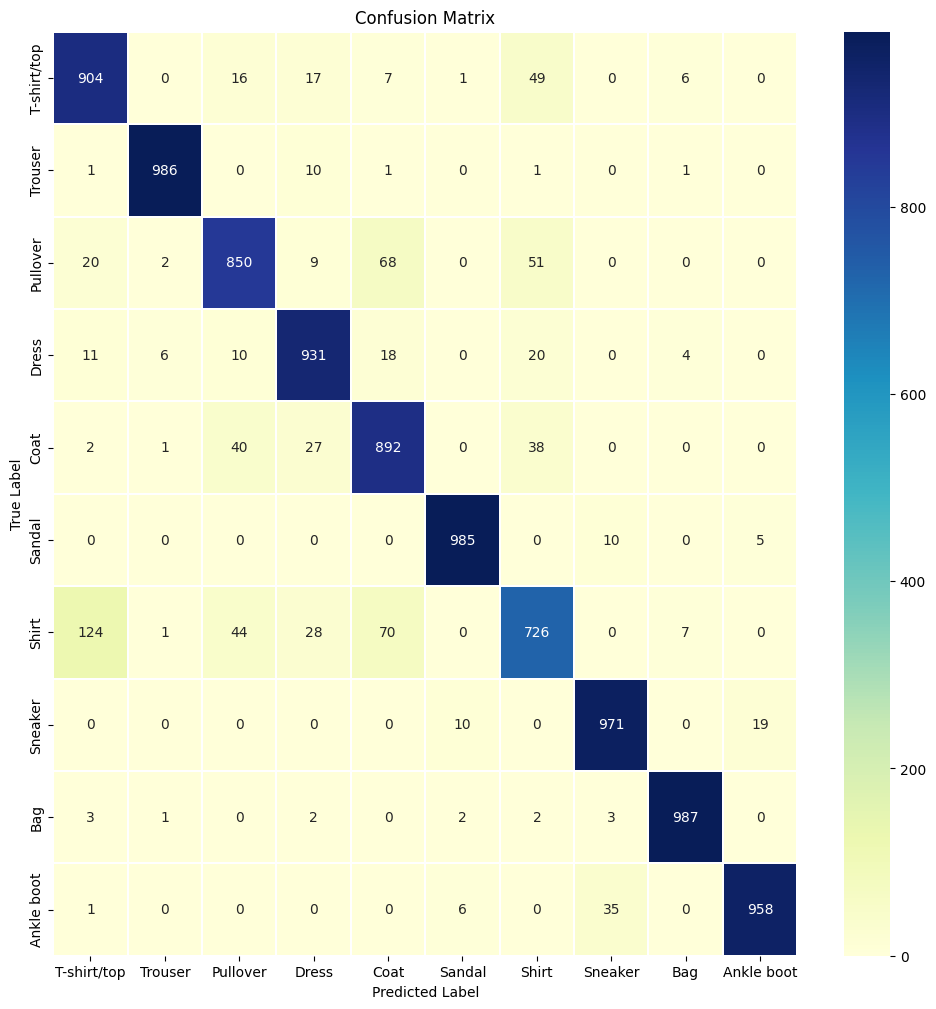

In [ ]:
y_pred_classes = np.argmax(predictions, axis = 1)
y_test = y_test.reshape(-1,1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "YlGnBu", linecolor="white", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names);
plt.show()